 # Image Processing Lab: Sharpening Filters

In this lab, we will explore techniques to enhance image details and detect edges using various filters provided by OpenCV.

Covered Topics:
1. **Sharpening Filters**:
   - Laplacian
   - Unsharp Masking
   - Custom Kernel

2. **Edge Detection Filters**:
   - Sobel (X, Y, and combined)
   - Canny Edge Detection

We will also explore the parameters of OpenCV functions like:
- `cv2.Laplacian()`
- `cv2.Sobel()`
- `cv2.Canny()`
- `cv2.filter2D()`
- `cv2.GaussianBlur()`


## Required Packages

- `opencv-python`
- `numpy`
- `matplotlib`

## Read Image, Convert it to grey, and display it

In [2]:
image_path = "cameraman.jpg" # change this to your image path

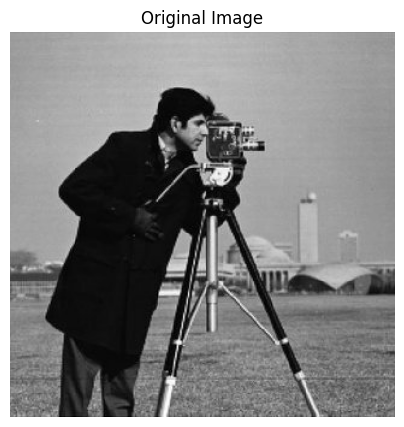

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def show_image(title, image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

img = cv2.imread(image_path)  
show_image("Original Image", img)


## Part 1: SHARPENING FILTERS

### Laplacian Sharpening

The Laplacian filter is a second-order derivative operator that detects areas of rapid intensity change (edges).

#### `cv2.Laplacian(src, ddepth, ksize)`
- `src`: Input image (grayscale recommended).
- `ddepth`: Desired depth of the output image (e.g., `cv2.CV_64F` for precision).
- `ksize`: Kernel size (must be odd, like 1, 3, or 5).

ddepth Value	Description
- -1	Use the same depth as the input image.
- cv2.CV_8U	8-bit unsigned int (0 to 255)
- cv2.CV_16S	16-bit signed int (can store negatives)
- cv2.CV_64F	64-bit float (high precision, supports decimals and negatives)


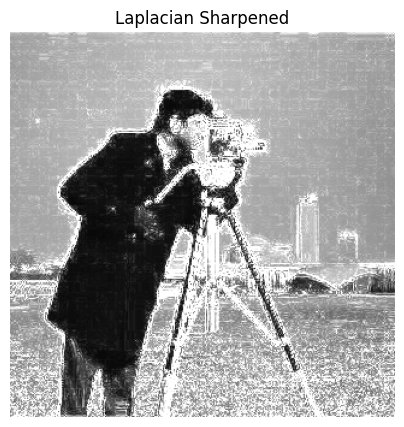

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
laplacian = cv2.convertScaleAbs(laplacian)
sharpened_lap = cv2.add(gray, laplacian)
show_image("Laplacian Sharpened", cv2.cvtColor(sharpened_lap, cv2.COLOR_GRAY2BGR))


### 🔹 Unsharp Masking

This technique enhances an image by subtracting a blurred version from the original and amplifying the result.

#### Steps:
1. Apply Gaussian blur.
2. Subtract blurred from original.
3. Use `cv2.addWeighted()` to combine.

#### `cv2.addWeighted(src1, alpha, src2, beta, gamma)`
- Performs: `result = src1 * alpha + src2 * beta + gamma`

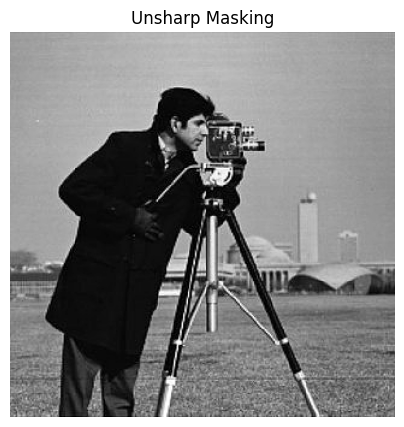

In [5]:
blurred = cv2.GaussianBlur(img, (5, 5), 0)
unsharp = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
show_image("Unsharp Masking", unsharp)


### Custom Kernel Sharpening

We can define our sharpening kernel manually and apply it using `cv2.filter2D`.


#### `cv2.filter2D(src, ddepth, kernel)`
- Applies a custom 2D convolution kernel to an image.


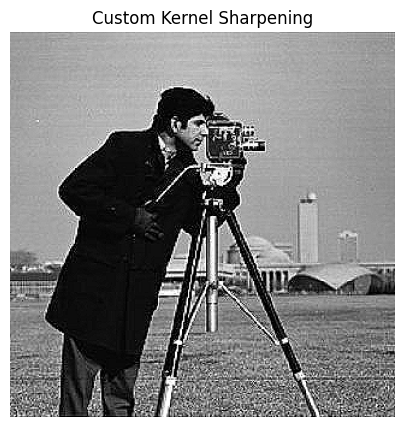

In [10]:
kernel = np.array([[0, -1,  0],
                   [-1,  5, -1],
                   [0, -1,  0]])
sharpened_custom = cv2.filter2D(img, -1, kernel)
show_image("Custom Kernel Sharpening", sharpened_custom)


### Part 2: Edge Detection

![Edge Screenshot](screentshots/Edge.png)

### Sobel Operator

Sobel is a first-order derivative operator that calculates the gradient in X and Y directions.

#### `cv2.Sobel(src, ddepth, dx, dy, ksize)`
- `dx`: Order of derivative in x-direction (1 or 0).
- `dy`: Order of derivative in y-direction (1 or 0).
- `ksize`: Kernel size (odd number).

Common usage:
- Horizontal edges: `dx=1, dy=0`
- Vertical edges: `dx=0, dy=1`
- Both: Combine both results

![Sobel Filter](screentshots/Sobel.png)



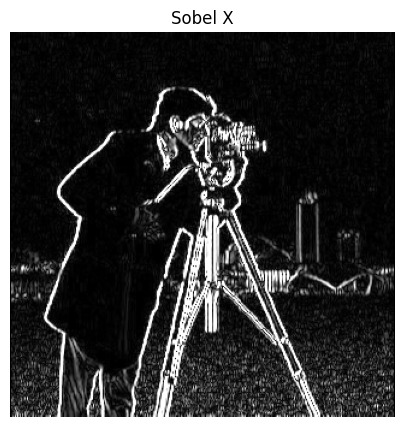

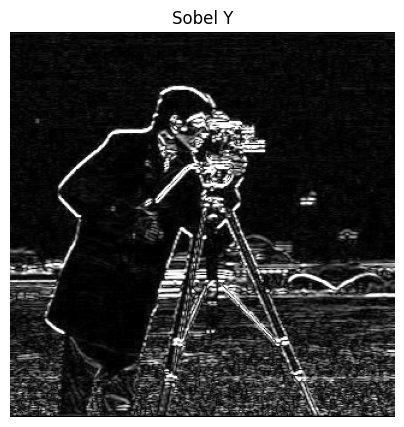

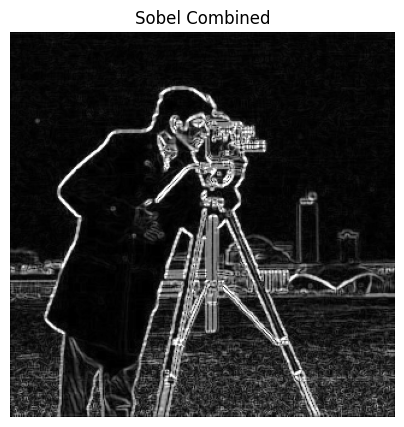

In [11]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)

sobel_combined = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

show_image("Sobel X", cv2.cvtColor(sobelx, cv2.COLOR_GRAY2BGR))
show_image("Sobel Y", cv2.cvtColor(sobely, cv2.COLOR_GRAY2BGR))
show_image("Sobel Combined", cv2.cvtColor(sobel_combined, cv2.COLOR_GRAY2BGR))


###  Canny Edge Detection

A powerful multi-stage edge detector.

#### `cv2.Canny(image, threshold1, threshold2)`
- `threshold1`: Lower bound.
- `threshold2`: Upper bound.
- Edges with gradient intensity higher than `threshold2` are strong edges.
- Those between the thresholds are weak edges (kept if connected to strong edges).

![Canny Screenshot](screentshots/Canny.webp)


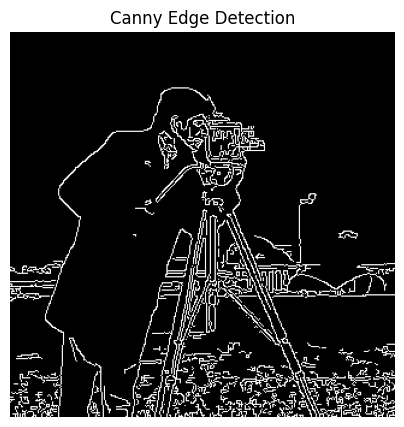

In [8]:
edges = cv2.Canny(gray, 100, 200)
show_image("Canny Edge Detection", cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR))


### Custom Kerenel For Edge Detection

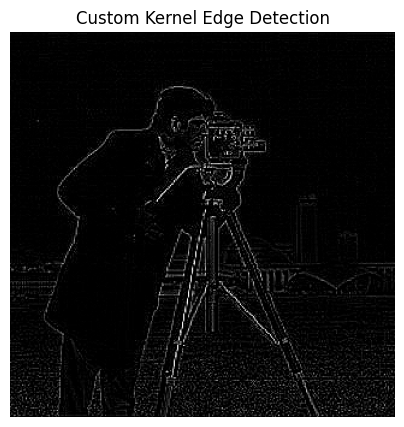

In [ ]:
kernel = np.array([[0, -1,  0],
                   [-1,  4, -1],
                   [0, -1,  0]])
edge_custom = cv2.filter2D(img, -1, kernel)
show_image("Custom Kernel Edge Detection", edge_custom)